In [1]:
import numpy as np
import mnist

In [2]:
def relu(x):
    return np.maximum(0, x)

In [3]:
data = mnist.load_mnist(flatten = True, one_hot_label=True)

In [4]:
training_idx = 0
test_idx = 1
image_idx = 0
label_idx = 1

In [5]:
import matplotlib.pyplot as plt

In [6]:
inputData = data[training_idx][image_idx]
labelData = data[training_idx][label_idx]

In [7]:
# class

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    # np.exp(-x) が大きくなりすぎるとエラーが出るため、クリッピング対策
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # シグモイドの微分は s * (1 - s) で計算できる
    s = sigmoid(x)
    return s * (1 - s)
    

class NN:
    def __init__(self, inputDataSize):
        self.weight1 = np.random.rand(inputDataSize, 16) / np.sqrt(inputDataSize)
        self.bias1 = np.random.rand(16, )
        
        # len(layer1) = 16
        self.weight2 = np.random.rand(16, 16) / np.sqrt(16)
        self.bias2 = np.random.rand(16, )
        # len(layer2) = 16
        self.weight3 = np.random.rand(16, 10) / np.sqrt(16)
        self.bias3 = np.random.rand(10, )

    def forward(self, inputData):
        self.inputData = inputData
        self.z1 = np.dot(inputData, self.weight1) + self.bias1

        self.z2 = np.dot(self.z1, self.weight2) + self.bias2

        self.z3 = np.dot(self.z2, self.weight3) + self.bias3
        
        self.output = sigmoid(self.z3)
        # ReLUだと誤差逆伝播法でウェイトの値が爆発しちゃうのでシグモイド関数で抑え込んだ。
        return self.output

    def backward(self, meandiff, learning_rate=0.01):
        delta3 = 2 * meandiff * sigmoid_derivative(self.z3)
        # print("delta3", delta3)
        z2 = self.z2.reshape(1, -1)
        delta3 = delta3.reshape(1, -1)
        z1 = self.z1.reshape(1, -1)
        inputData = self.inputData.reshape(1, -1)

        dW3 = np.dot(z2.T, delta3)
        # print("dW3", dW3)
        db3 = np.sum(delta3, axis=0)
        # print("db3", db3)

        delta2 = np.dot(delta3, self.weight3.T)
        # print("delta2", delta2)
        dW2 = np.dot(z1.T, delta2)
        # print("dW2", dW2)
        db2 = np.sum(delta2, axis=0)
        # print("db2", db2)

        delta1 = np.dot(delta2, self.weight2.T)
        # print("delta1", delta1)
        dW1 = np.dot(inputData.T, delta1)
        # print("dW1", dW1)
        db1 = np.sum(delta1, axis=0)
        # print("db1", db1)

        # パラメータの更新
        self.weight3 -= learning_rate * dW3
        # print("weight3", self.weight3)
        self.bias3   -= learning_rate * db3
        # print("bias3", self.bias3)
        self.weight2 -= learning_rate * dW2
        # print("weight2", self.weight2)
        self.bias2   -= learning_rate * db2
        # print("bias2", self.bias2)
        self.weight1 -= learning_rate * dW1
        # print("weight1", self.weight1)
        self.bias1   -= learning_rate * db1
        # print("bias1", self.bias1)

In [8]:
meandiff = 0
nn = NN(784)

for i in range(10):
    for idx, elem in enumerate(inputData[0:60000]):
        result = nn.forward(elem)
        diff = result - labelData[idx]
        nn.backward(diff, 0.002)

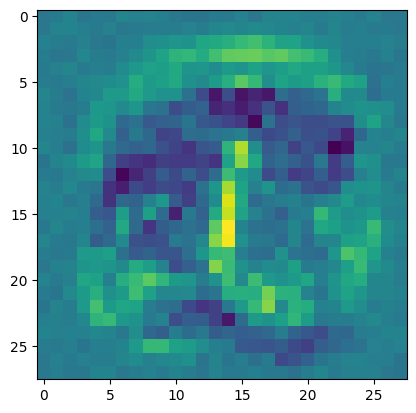

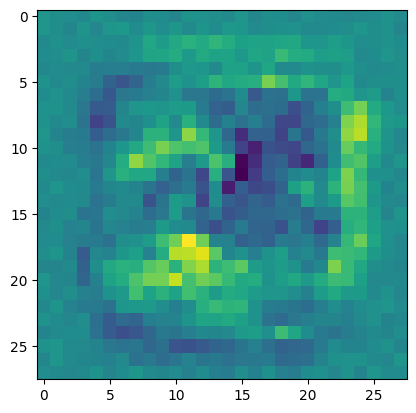

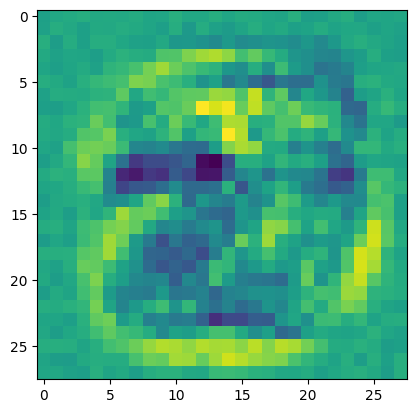

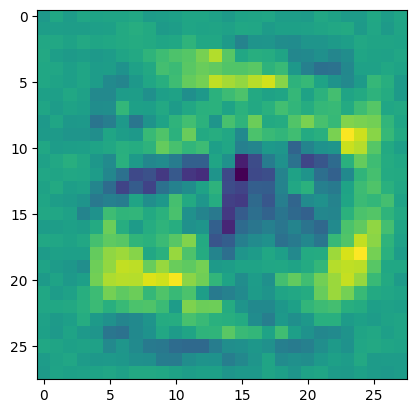

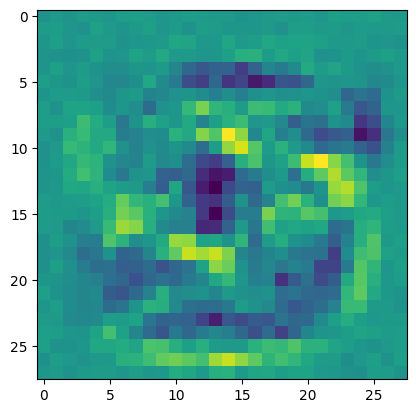

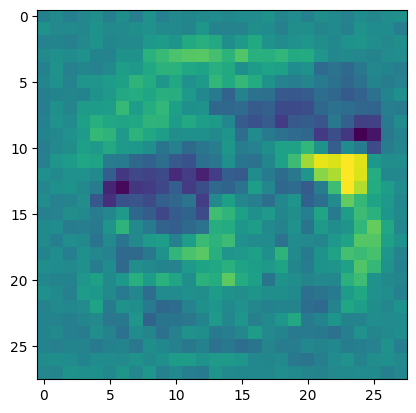

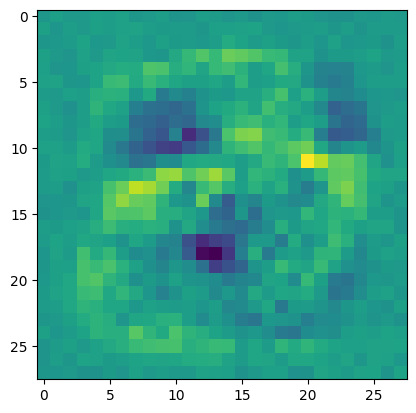

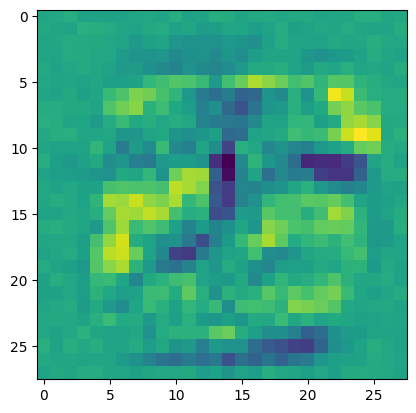

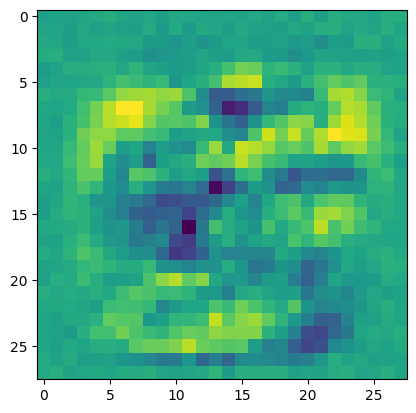

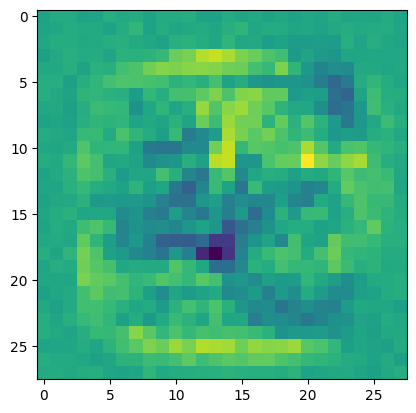

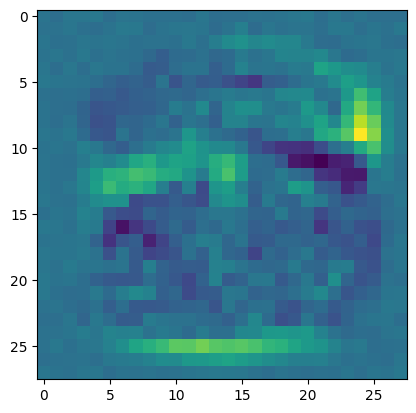

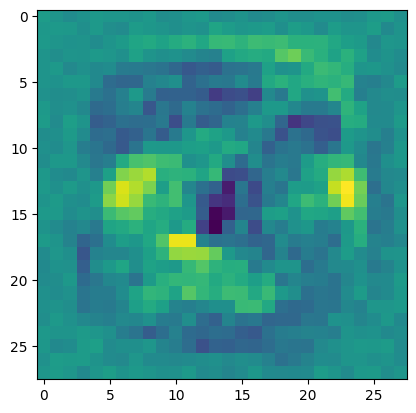

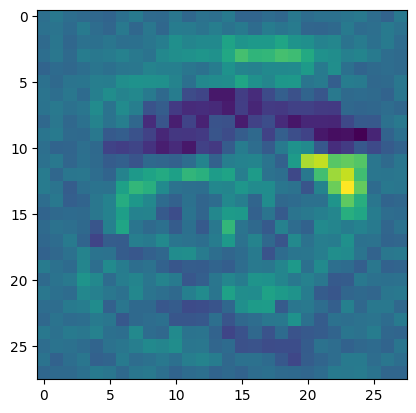

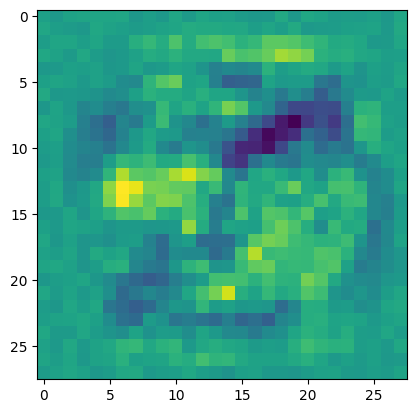

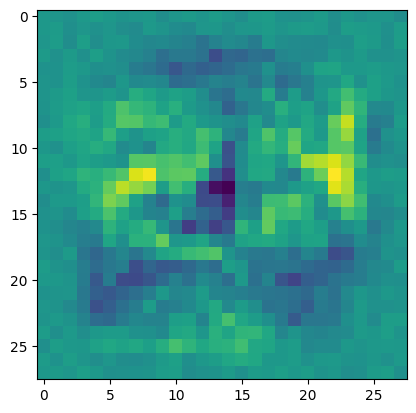

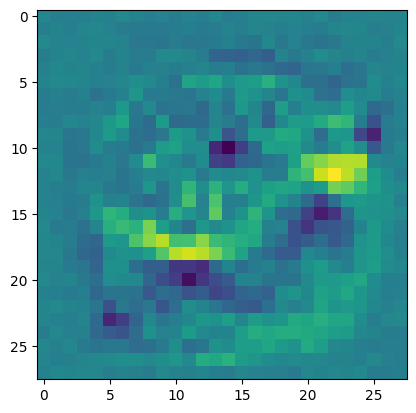

In [9]:
for i in range(16):
    plt.imshow(nn.weight1.T[i].reshape(28, 28))
    plt.show()

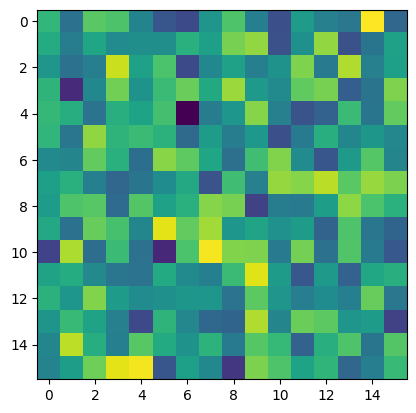

In [10]:
plt.imshow(nn.weight2)

In [11]:
result = nn.forward(inputData[1])
np.where(result == np.max(result))

(array([0]),)

In [12]:
score = 0
loseIdx = []
failureResult = []

for idx, elem in enumerate(inputData[0:60000]):
    result = nn.forward(inputData[idx])
    resultMaximum = np.where(result == np.max(result))
    labelMaximum = np.where(labelData[idx] == np.max(labelData[idx]))
    if resultMaximum == labelMaximum:
        score+=1
    else:
        loseIdx.append(idx)
        failureResult.append((idx, resultMaximum, labelMaximum))

In [13]:
print(score / 60000 * 100, "%")

91.26166666666666 %


In [19]:
testData = data[test_idx][image_idx]
testLabelData = data[test_idx][label_idx]

In [20]:
len(testData)

10000

In [22]:
score = 0
loseIdx = []
failureResult = []

for idx, elem in enumerate(testData):
    result = nn.forward(testData[idx])
    resultMaximum = np.where(result == np.max(result))
    labelMaximum = np.where(testLabelData[idx] == np.max(testLabelData[idx]))
    if resultMaximum == labelMaximum:
        score+=1
    else:
        loseIdx.append(idx)
        failureResult.append((idx, resultMaximum, labelMaximum))

In [24]:
print(score / 10000 * 100, "%")

91.42 %


In [25]:
loseIdx[0:10]

[8, 38, 63, 66, 111, 119, 124, 144, 149, 151]

(193, (array([4]),), (array([9]),))


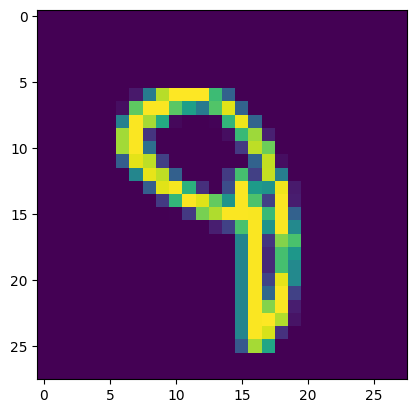

(211, (array([7]),), (array([5]),))


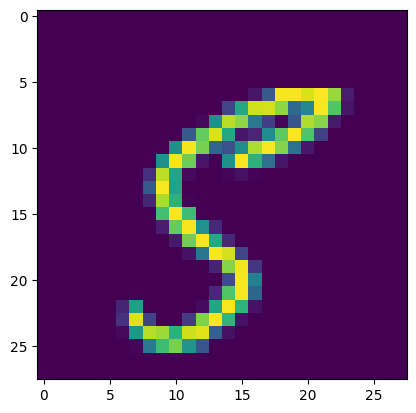

(217, (array([5]),), (array([6]),))


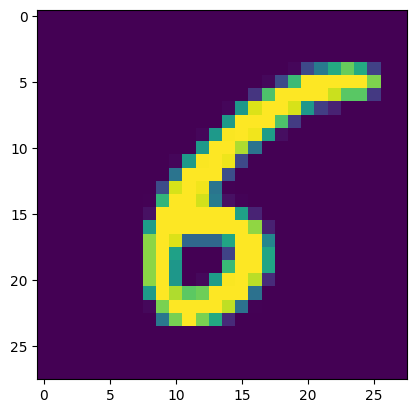

(233, (array([7]),), (array([8]),))


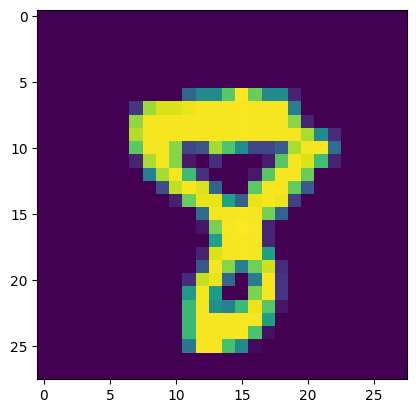

(241, (array([3]),), (array([9]),))


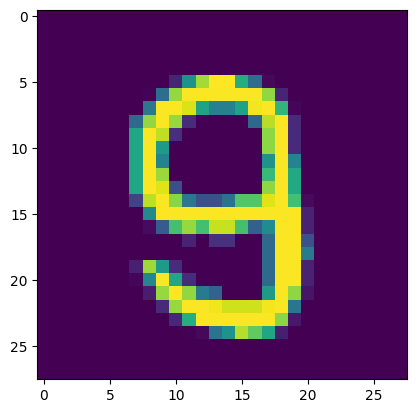

(247, (array([6]),), (array([4]),))


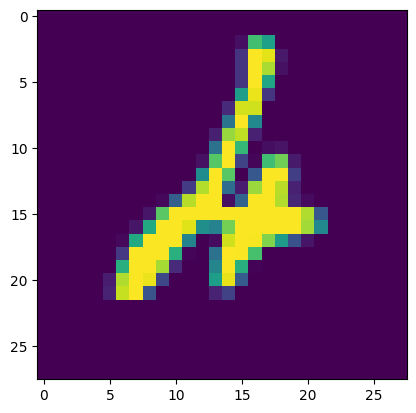

(259, (array([0]),), (array([6]),))


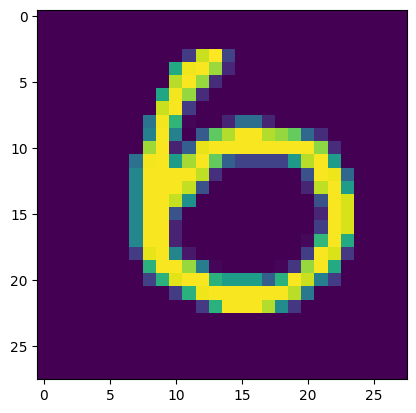

(282, (array([2]),), (array([7]),))


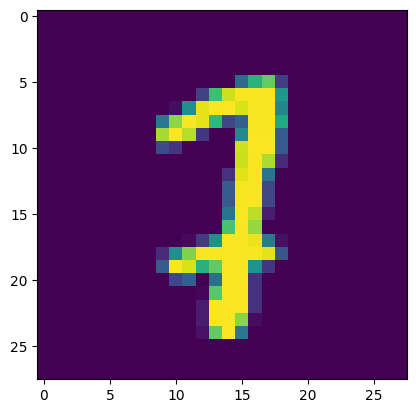

(290, (array([4]),), (array([8]),))


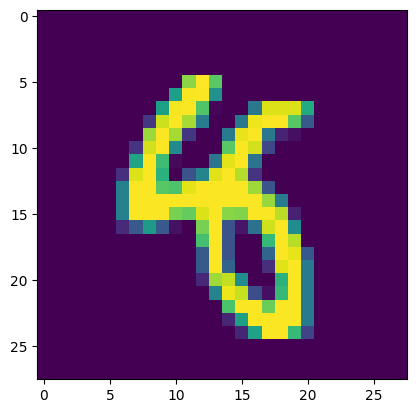

(300, (array([1]),), (array([4]),))


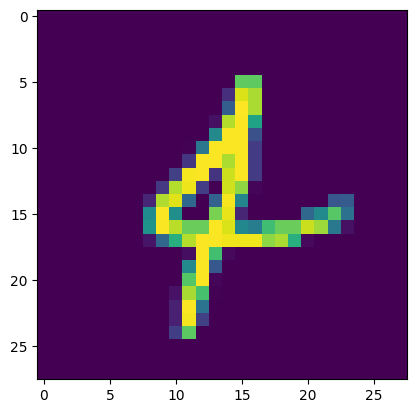

In [33]:
for i in range(10,20):
    print(failureResult[i])
    plt.imshow(testData[loseIdx[i]].reshape(28,28))
    plt.show()

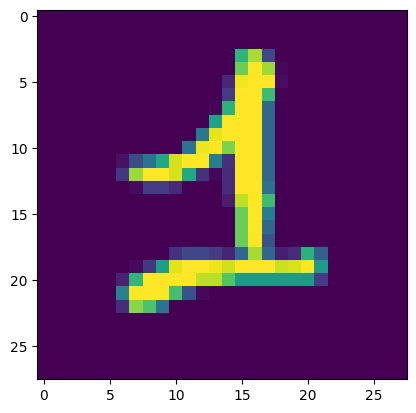

In [15]:
plt.imshow(inputData[24].reshape(28, 28))

In [16]:
failureResult[0]

(24, (array([3]),), (array([1]),))

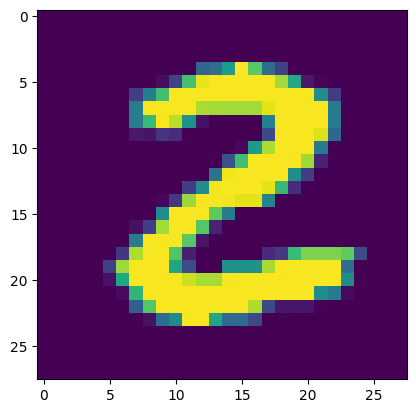

In [17]:
plt.imshow(inputData[25].reshape(28, 28))

In [18]:
failureResult[1]

(28, (array([7]),), (array([2]),))